### Mount Google drive

*  Mount Google drive in the directory '/content/drive'
*  Drive contains dataset files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install packages

*  `transformers` package
*  `datasets` package
*  pip will install all models and dependencies automatically.

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U
!pip install sklearn
!pip install evaluate
!pip install datasets
!pip install emoji
!pip install tensorboardX
!pip install crc32c
!pip install soundfile
!pip install sentencepiece
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=e074d23a3ee001048bbd7cb36666331825116ed5b475ed99726bc02ad830f909
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
!set CUDA_LAUNCH_BLOCKING=1
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

### Imports

In [ ]:
import os
import csv
import torch
import sklearn
import datasets
import evaluate
import numpy as np
import pandas as pd
from torch import nn
import tensorflow as tf
from datasets import Dataset
from collections import Counter
import torch.nn.functional as F
from transformers import Trainer
from datasets import load_metric
from transformers import AutoTokenizer, AutoModel
from datasets import ClassLabel, Value
from transformers import create_optimizer
from transformers import DataCollatorWithPadding
from sklearn.metrics import classification_report
from transformers import TextClassificationPipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
from transformers.keras_callbacks import KerasMetricCallback
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

### task 4

In [ ]:
modelsave="Model_Path_In_Drive"

##### Get the preprocessed dataset

In [ ]:
tsne = pd.read_csv("/content/drive/MyDrive/dataset/4/originalvalidate.csv", delimiter=',', index_col=False, encoding='latin1')

In [ ]:
tsne = tsne[(tsne['label'] == '1') | (tsne['label'] == '0')]
tsne['label'] = tsne['label'].astype(int)
tsne = tsne.dropna(subset=['label']).reset_index(drop=True)
y_true = [int(label) for label in tsne.label.values]

##### Get your model

In [23]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained(modelsave, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(modelsave)

In [ ]:
tokenizer.model_max_length = 512

### task 1 

In [137]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained(modelsave, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

In [130]:
tsne = pd.read_csv("/content/drive/MyDrive/dataset/1/originalvalidate.tsv", sep='\t', quoting=csv.QUOTE_NONE)

### task 2 

In [87]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained(modelsave, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

In [88]:
tsne = pd.read_csv("/content/drive/MyDrive/dataset/2/originalvalidate.csv", delimiter=',', index_col=False, encoding='latin1')
tsne = tsne.dropna()
tsne.loc[ tsne["label"] == 'positive', "label"] = 2 # Positive classification
tsne.loc[ tsne["label"] == 'neutral', "label"] = 1 # Neutral classification
tsne.loc[ tsne["label"] == 'negative', "label"] = 0 # Negative classification

### t-SNE Visualisation Implementation

In [138]:
model = model.to('cpu')

In [139]:
l = []
with torch.no_grad():
  for i in range(len(tsne)):
    if (i != 0 and i % 100 == 0):
        print(i)
    text = tsne['text'][i]
    inputs = tokenizer(text, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    cls_embedding = outputs.hidden_states[-1][0][0]
    l.append(cls_embedding)
    del text, inputs, outputs, cls_embedding

100
200
300


In [140]:
data = [t_item.flatten().detach().numpy() for t_item in l]
tsne_df = pd.DataFrame(data)
print(tsne_df.shape)

(400, 1024)


In [141]:
tsne_df['label'] = tsne.label.values
tsne_df.to_csv('/content/drive/MyDrive/dataset/2/yourfilename.csv', index=False)

In [142]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = np.array(data)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
label = tsne.label.values
plt.figure(figsize=(8, 6))
unique_labels = np.unique(label)

<Figure size 800x600 with 0 Axes>

### Our Visualisations

##### task1baseline

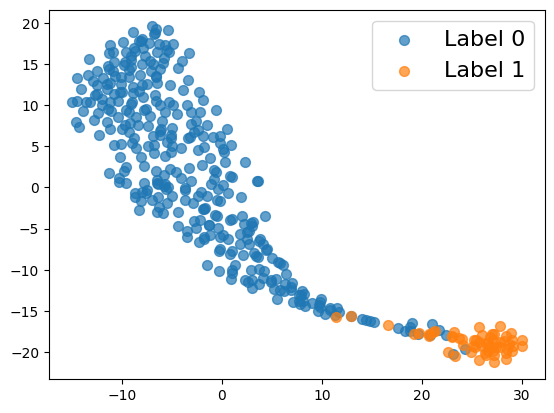

In [143]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task1baseline.png', dpi=1000)
plt.show()

##### task2baseline

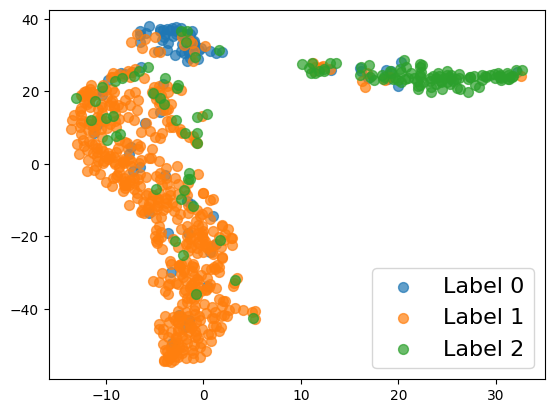

In [100]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task2baseline.png', dpi=1000)
plt.show()

##### task2baseline2

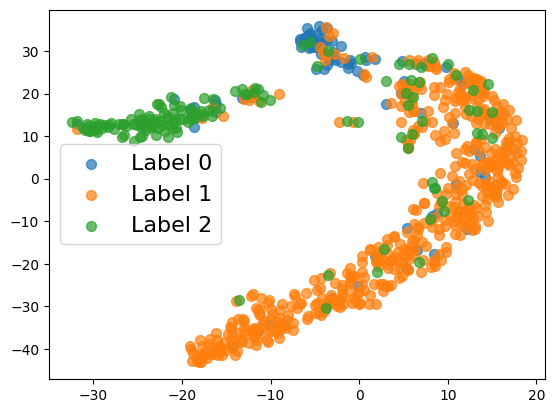

In [102]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task2baseline2.png', dpi=1000)
plt.show()

##### task1ALEX

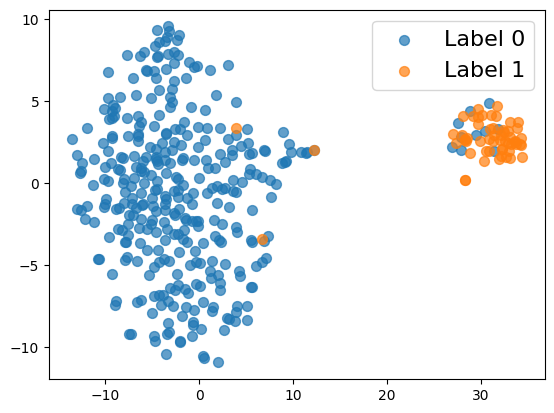

In [85]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task1ALEX.png', dpi=1000)
plt.show()

##### task1ALEX2

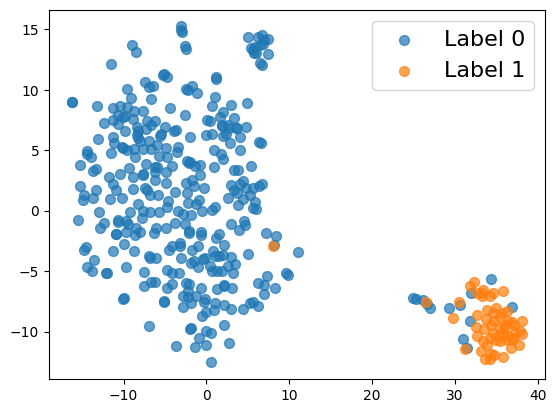

In [63]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task1ALEX2.png', dpi=1000)
plt.show()

##### task4bsaeline

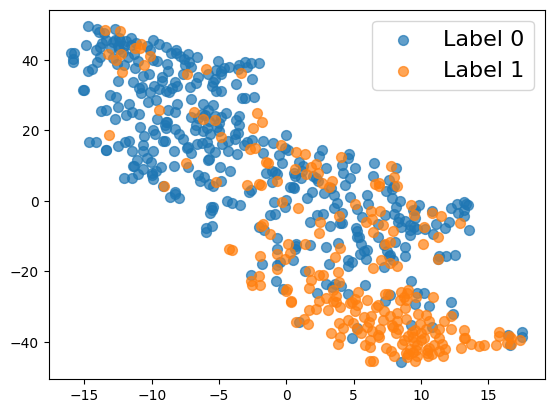

In [43]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task4bsaeline.png', dpi=1000)
plt.show()

##### task2ALEX

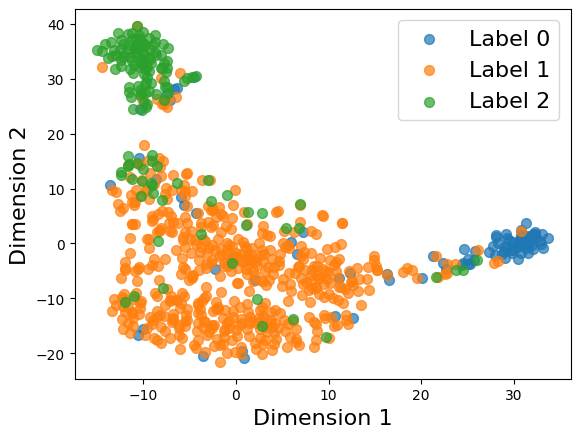

In [ ]:
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.xlabel('Dimension 1', fontsize=16)
plt.ylabel('Dimension 2', fontsize=16)

plt.legend(fontsize=16)
plt.savefig('/content/drive/MyDrive/dataset/tsne/task2ALEX.png', dpi=1000)
plt.show()

##### Task4ALEX

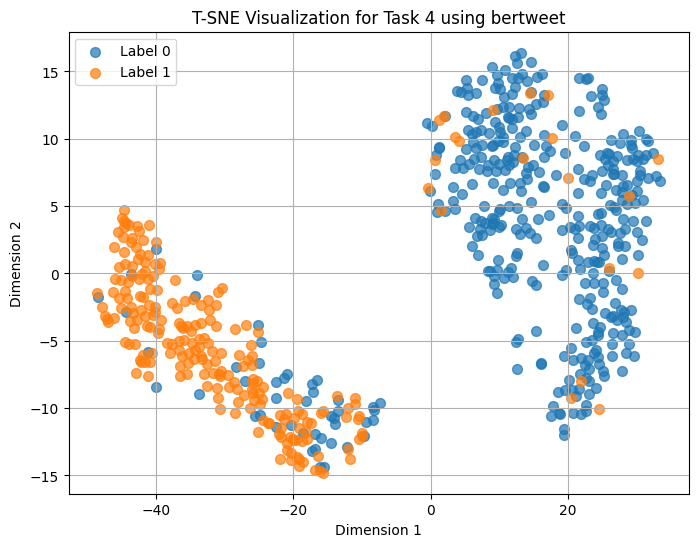

In [ ]:
X = np.array(data)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
label = tsne.label.values
plt.figure(figsize=(8, 6))
unique_labels = np.unique(label)
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Task4ALEX')
plt.legend()
plt.grid(True)
plt.show()

##### Task4baseline_before_fine-tuning

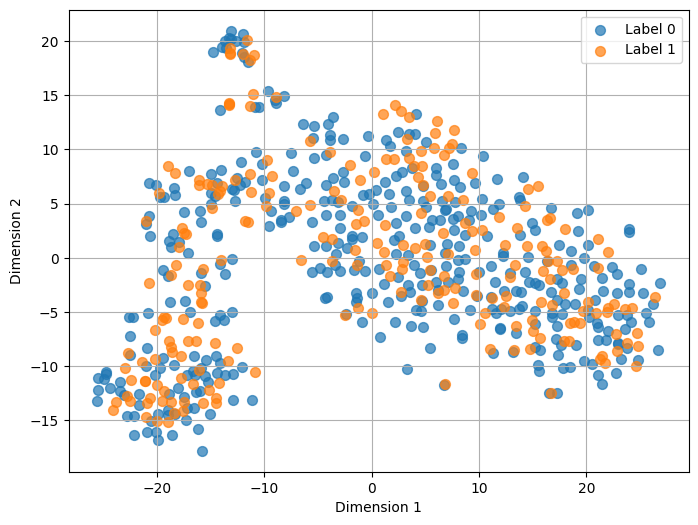

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = np.array(data)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
label = tsne.label.values
plt.figure(figsize=(8, 6))
unique_labels = np.unique(label)
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

##### Task2baseline_before_fine-tuning

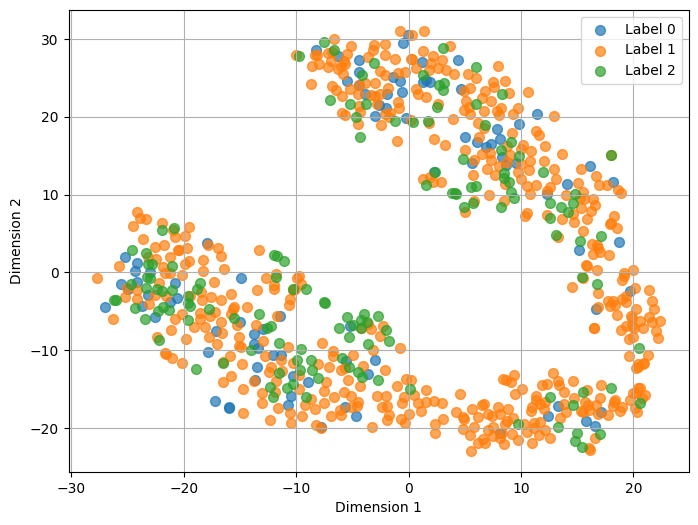

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = np.array(data)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
label = tsne.label.values
plt.figure(figsize=(8, 6))
unique_labels = np.unique(label)
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

##### Task1baseline_before_fine-tuning

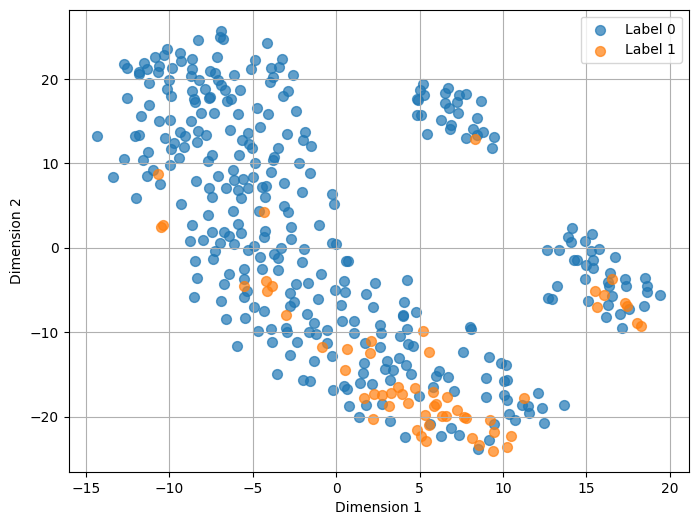

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = np.array(data)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)
label = tsne.label.values
plt.figure(figsize=(8, 6))
unique_labels = np.unique(label)
for lbl in unique_labels:
    mask = label == lbl
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=f'Label {lbl}', marker='o', s=50, alpha=0.7)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

### PCA Visualisation

In [ ]:
!pip install yellowbrick
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA
X = tsne_df
y = tsne.label.values
classes = ['negative class', 'positive class']

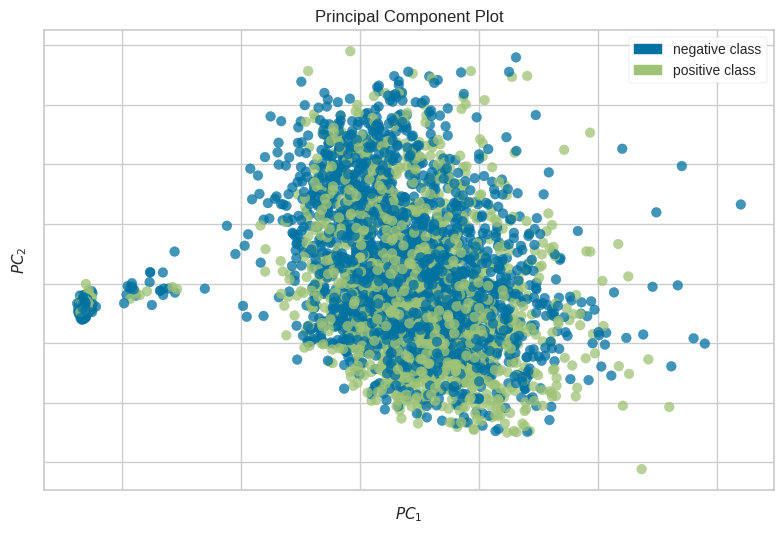

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.title = "Task 4 Dataset Visualization"
visualizer.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


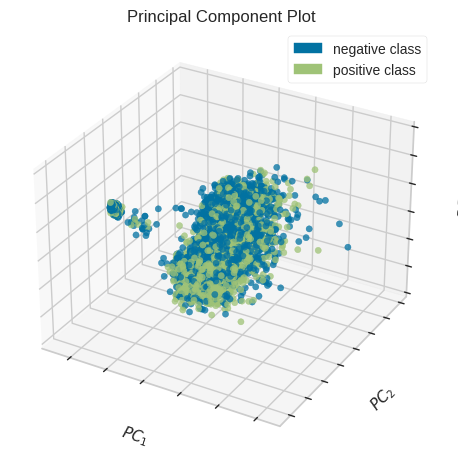

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [ ]:
visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X, y)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


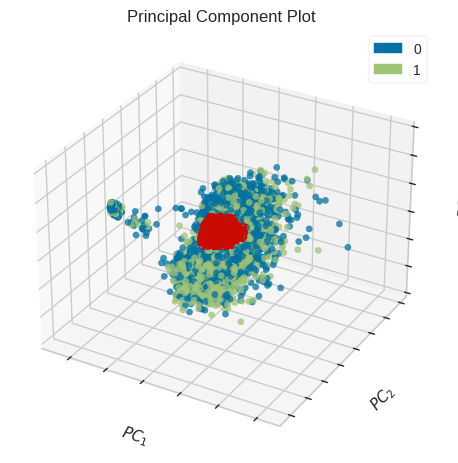

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [ ]:
visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()

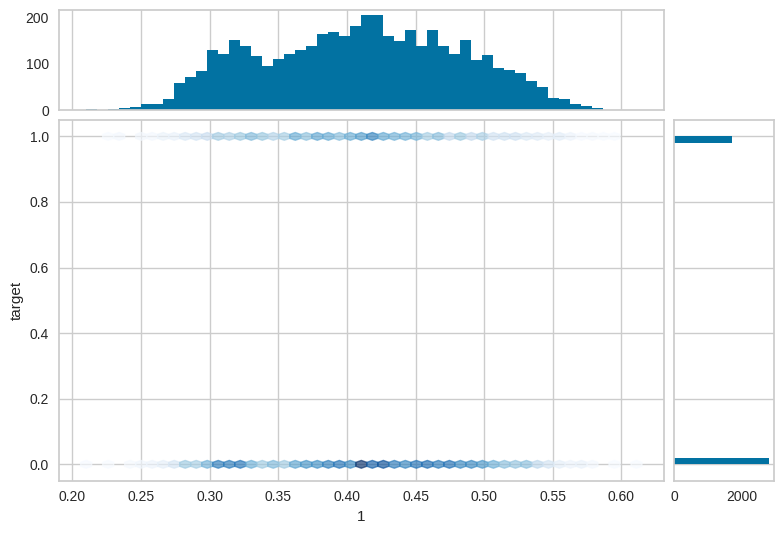

<Axes: xlabel='1', ylabel='target'>

In [ ]:
from yellowbrick.features import JointPlotVisualizer
visualizer = JointPlotVisualizer(columns=1, kind="hexbin")
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(tsne_df)
df_reduced = pd.DataFrame(df_2d, columns=['PC1', 'PC2'])
print(df_reduced)


           PC1       PC2
0    -1.414304  0.658244
1     1.489470 -0.237130
2     1.606313 -0.720882
3     3.450799 -0.234657
4     1.207274 -1.048010
...        ...       ...
4495  0.610867 -0.951093
4496  0.538799 -0.594960
4497 -5.673123 -0.279326
4498  0.638951  0.186186
4499 -5.700385 -0.192538

[4500 rows x 2 columns]


In [ ]:
X = df_reduced

In [ ]:
y = tsne.label.values

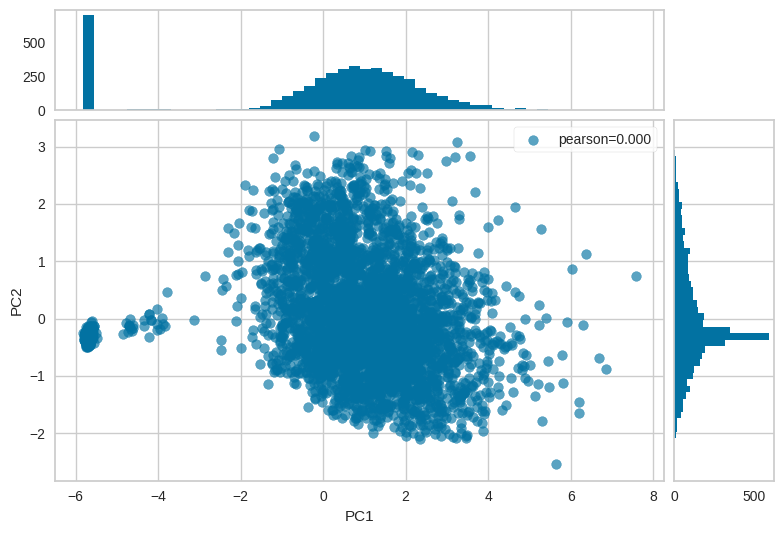

<Axes: xlabel='PC1', ylabel='PC2'>

In [ ]:
visualizer = JointPlotVisualizer(columns=["PC1", "PC2"])
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
df_reduced['label'] = y

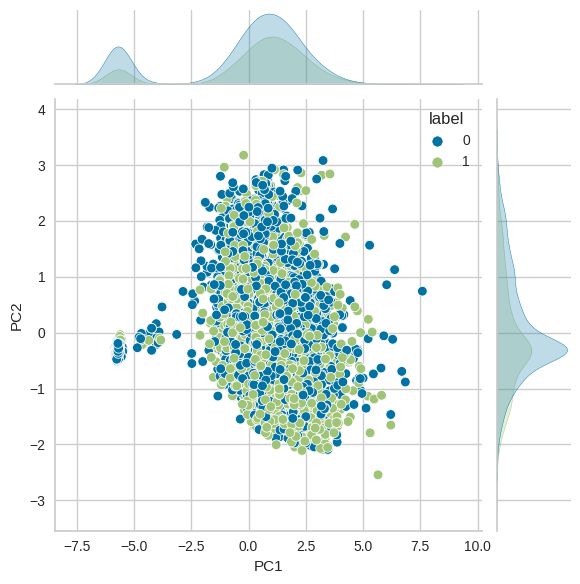

In [ ]:
import seaborn as sns
sns.jointplot(data=df_reduced, x="PC1", y="PC2", hue="label")

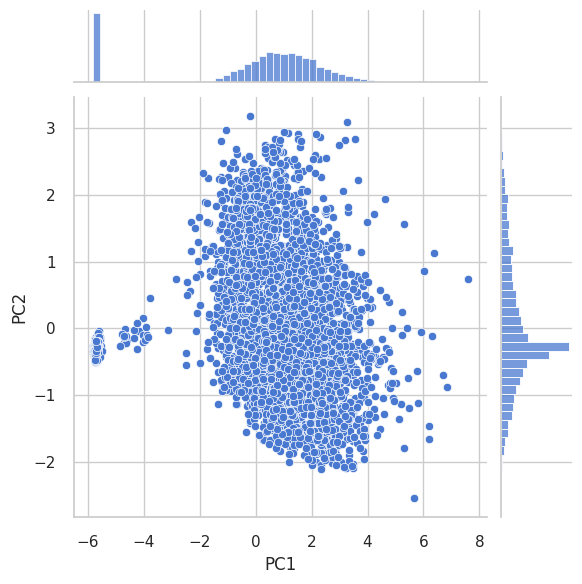

In [ ]:
sns.jointplot(data=df_reduced, x="PC1", y="PC2")

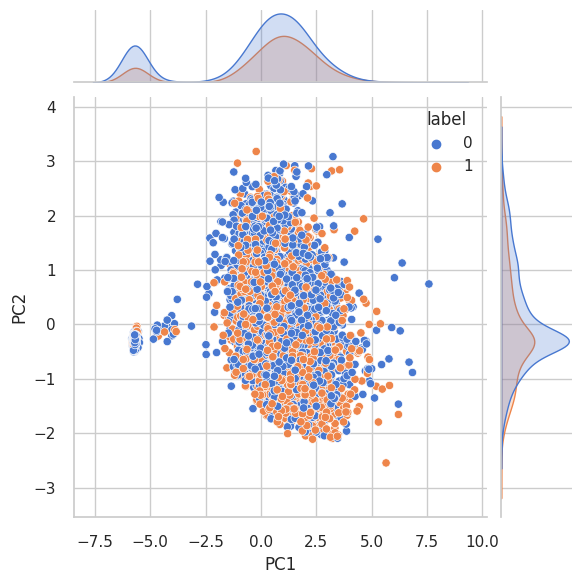

In [ ]:
sns.set(style="whitegrid", palette="muted")
sns.jointplot(data=df_reduced, x="PC1", y="PC2", hue="label")

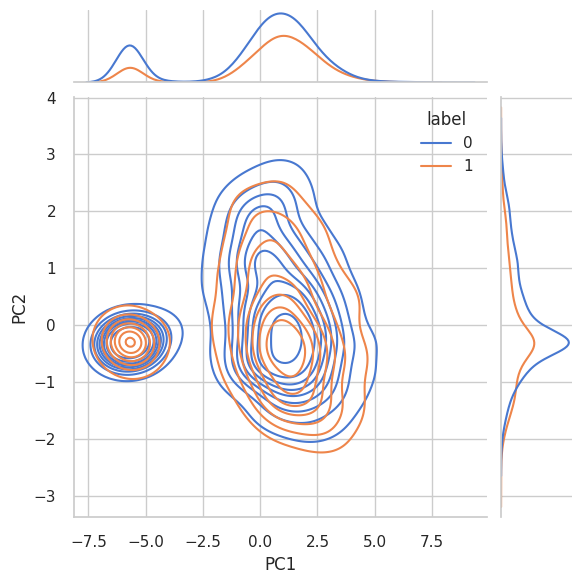

In [ ]:
sns.jointplot(data=df_reduced, x="PC1", y="PC2", hue="label", kind="kde")

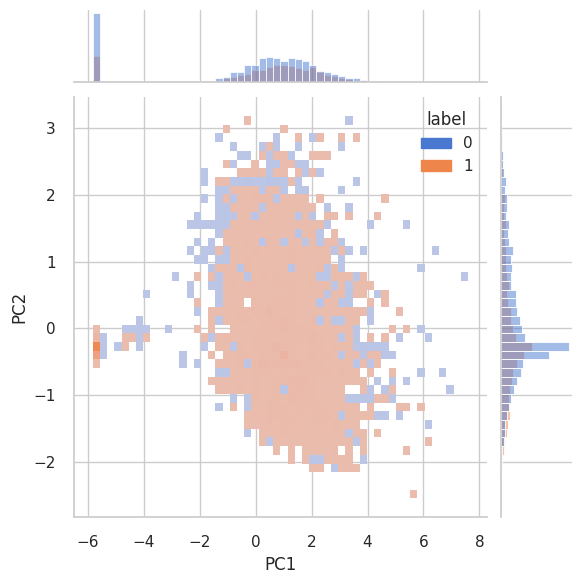

In [ ]:
sns.jointplot(data=df_reduced, x="PC1", y="PC2", hue="label", kind="hist")

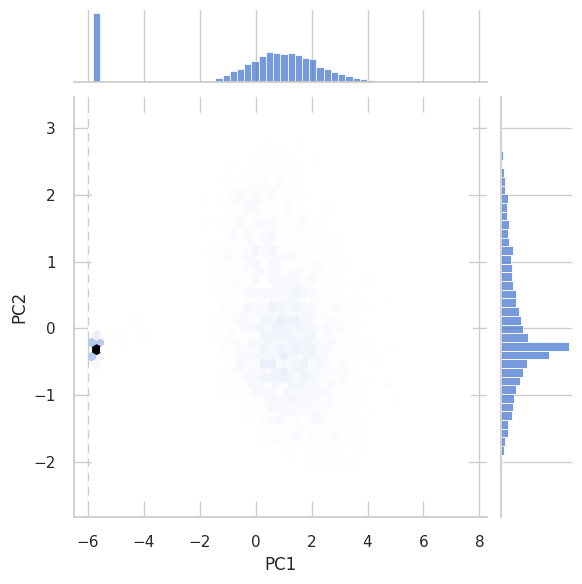

In [ ]:
sns.jointplot(data=df_reduced, x="PC1", y="PC2", kind="hex")

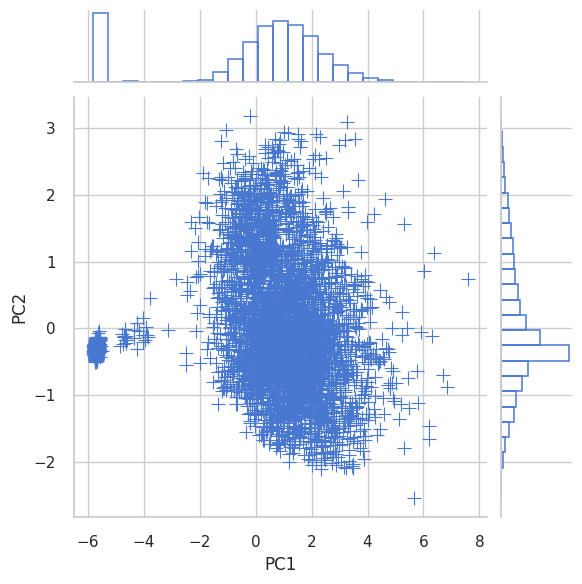

In [ ]:
sns.jointplot(
    data=df_reduced, x="PC1", y="PC2",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)